In [60]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import seaborn as sns
%matplotlib inline

In [61]:
with open('/home/patrick/Code/Bioinformatics/Genomes/Reads/seq_sample.fasta') as in_file:
    seq_list = in_file.readlines()
seq_name = seq_list.pop(0)
seq_list = [i.strip() for i in seq_list]

In [62]:
seq_list

['atggatttagagaaaaattatccgactcctcggaccagcaggacaggacatggaggagtg',
 'aatcagcttgggggggtttttgtgaatggacggccactcccggatgtagtccgccagagg',
 'atagtggaacttgctcatcaaggtgtcaggccctgcgacatctccaggcagcttcgggtc',
 'agccatggttgtgtcagcaaaattcttggcaggtattatgagacaggaagcatcaagcct',
 'ggggtaattggaggatccaaaccaaaggtcgccacacccaaagtggtggaaaaaatcgct',
 'gagtataaacgccaaaatcccaccatgtttgcctgggagatcaggggccggctgctggca',
 'gagcgggtgtgtgacaatgacaccgtgcctagcgtcagttccatcaacaggatcatccgg',
 'acaaaagtacagcagccacccaaccaaccagtcccagcttccagtcacagcatagtgtcc',
 'actggctccgtgacgcaggtgtcctcggtgagcacggattcggccggctcgtcgtactcc',
 'atcagcggcatcctgggcatcacgtcccccagcgccgacaccaacaagcgcaagagagac',
 'gaaggtattcaggagtctccggtgccgaacggctactcgcttccgggcagagacttcctc',
 'cggaagcagatgcggggagacttgttcacacagcagcagctggaggtgctggaccgcgtg',
 'tttgagaggcagcactactcagacatcttcaccaccacagagcccatcaagcccgagcag',
 'accacagagtattcagccatggcctcgctggctggtgggctggacgacatgaaggccaat',
 'ctggccagccccacccctgctgacatcgggagcagtgtgccaggcccgcagtcctacccc',
 'attgtgacaggccgtgacttggc

In [64]:
seq = ''
for line in seq_list:
    seq += line.rstrip().lower()
seq

'atggatttagagaaaaattatccgactcctcggaccagcaggacaggacatggaggagtgaatcagcttgggggggtttttgtgaatggacggccactcccggatgtagtccgccagaggatagtggaacttgctcatcaaggtgtcaggccctgcgacatctccaggcagcttcgggtcagccatggttgtgtcagcaaaattcttggcaggtattatgagacaggaagcatcaagcctggggtaattggaggatccaaaccaaaggtcgccacacccaaagtggtggaaaaaatcgctgagtataaacgccaaaatcccaccatgtttgcctgggagatcaggggccggctgctggcagagcgggtgtgtgacaatgacaccgtgcctagcgtcagttccatcaacaggatcatccggacaaaagtacagcagccacccaaccaaccagtcccagcttccagtcacagcatagtgtccactggctccgtgacgcaggtgtcctcggtgagcacggattcggccggctcgtcgtactccatcagcggcatcctgggcatcacgtcccccagcgccgacaccaacaagcgcaagagagacgaaggtattcaggagtctccggtgccgaacggctactcgcttccgggcagagacttcctccggaagcagatgcggggagacttgttcacacagcagcagctggaggtgctggaccgcgtgtttgagaggcagcactactcagacatcttcaccaccacagagcccatcaagcccgagcagaccacagagtattcagccatggcctcgctggctggtgggctggacgacatgaaggccaatctggccagccccacccctgctgacatcgggagcagtgtgccaggcccgcagtcctaccccattgtgacaggccgtgacttggcgagcacgaccctccccgggtaccctccacacgtcccccccgctggacagggcagctactcagcaccgacgctgaca

In [65]:
codons = {}
with open('codon_files/codons.txt') as codons_file:
    codons_list = codons_file.readlines()
#     codons_list[:10]

for count in range(0, len(codons_list), 2):
    key = codons_list[count].rstrip().lower()
    value = codons_list[count+1].rstrip()
    codons[key] = value

In [66]:
codons

{'ttt': 'F',
 'ttc': 'F',
 'tta': 'L',
 'ttg': 'L',
 'tct': 'S',
 'tcc': 'S',
 'tca': 'S',
 'tcg': 'S',
 'tat': 'Y',
 'tac': 'Y',
 'taa': '*',
 'tag': '*',
 'tgt': 'C',
 'tgc': 'C',
 'tga': '*',
 'tgg': 'W',
 'ctt': 'L',
 'ctc': 'L',
 'cta': 'L',
 'ctg': 'L',
 'cct': 'P',
 'ccc': 'P',
 'cca': 'P',
 'ccg': 'P',
 'cat': 'H',
 'cac': 'H',
 'caa': 'Q',
 'cag': 'Q',
 'cgt': 'R',
 'cgc': 'R',
 'cga': 'R',
 'cgg': 'R',
 'att': 'I',
 'atc': 'I',
 'ata': 'I',
 'atg': 'M',
 'act': 'T',
 'acc': 'T',
 'aca': 'T',
 'acg': 'T',
 'aat': 'N',
 'aac': 'N',
 'aaa': 'K',
 'aag': 'K',
 'agt': 'S',
 'agc': 'S',
 'aga': 'R',
 'agg': 'R',
 'gtt': 'V',
 'gtc': 'V',
 'gta': 'V',
 'gtg': 'V',
 'gct': 'A',
 'gcc': 'A',
 'gca': 'A',
 'gcg': 'A',
 'gat': 'D',
 'gac': 'D',
 'gaa': 'E',
 'gag': 'E',
 'ggt': 'G',
 'ggc': 'G',
 'gga': 'G',
 'ggg': 'G'}

In [25]:
protein_dict = {}
with open('translated_seqs.fasta', 'w') as f:
    for frame in range(0,3):
        protein = ''
        for count in range(frame, len(seq), 3):
            codon = seq[count:count+3]
            if codon in codons:
                aa = codons[codon]
            else:
                aa = '-'
            protein += aa
        print(f'\nframe: {frame}, protein: {protein}')
        f.write('> Frame:' + str(frame) + '\n' + protein + '\n')
        protein_dict[frame] = protein


frame: 0, protein: MDLEKNYPTPRTSRTGHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRGRLLAERVCDNDTVPSVSSINRIIRTKVQQPPNQPVPASSHSIVSTGSVTQVSSVSTDSAGSSYSISGILGITSPSADTNKRKRDEGIQESPVPNGYSLPGRDFLRKQMRGDLFTQQQLEVLDRVFERQHYSDIFTTTEPIKPEQTTEYSAMASLAGGLDDMKANLASPTPADIGSSVPGPQSYPIVTGRDLASTTLPGYPPHVPPAGQGSYSAPTLTGMVPGSEFSGSPYSHPQYSSYNDSWRFPNPGLLGSPYYYSAAARGAAPPAAATAYDRH-

frame: 1, protein: WI*RKIIRLLGPAGQDMEE*ISLGGFL*MDGHSRM*SARG*WNLLIKVSGPATSPGSFGSAMVVSAKFLAGIMRQEASSLG*LEDPNQRSPHPKWWKKSLSINAKIPPCLPGRSGAGCWQSGCVTMTPCLASVPSTGSSGQKYSSHPTNQSQLPVTA*CPLAP*RRCPR*ARIRPARRTPSAASWASRPPAPTPTSARETKVFRSLRCRTATRFRAETSSGSRCGETCSHSSSWRCWTACLRGSTTQTSSPPQSPSSPSRPQSIQPWPRWLVGWTT*RPIWPAPPLLTSGAVCQARSPTPL*QAVTWRARPSPGTLHTSPPLDRAATQHRR*QGWCLGVSFPGVPTATLSIPRTTTPGGSPTRGCLAPPTIIALPPEEPPHLQPPLPMTVT-

frame: 2, protein: GFREKLSDSSDQQDRTWRSESAWGGFCEWTATPGCSPPEDSGTCSSRCQALRHLQAASGQPWLCQQNSWQVL*DRKHQAWGNWRIQTKGRHTQSGGKNR*V*TPKSHHVCLGDQGPAAGRAGV*Q*HRA*RQFHQQDHPDKSTAATQPTSPSFQ

In [26]:
# protein_dict

In [27]:
aa_t_dict = {}
with open('codon_files/aa_translation.txt') as f:
    aa_t_list = f.readlines()
    aa_t_list = [i.strip().split() for i in aa_t_list]
    for i in aa_t_list:
        aa_t_dict[i[0]] = i[1]    
aa_t_dict['Arg']

'R'

In [67]:
aa_t_dict

{'Ala': 'A',
 'Arg': 'R',
 'Asn': 'N',
 'Asp': 'D',
 'Cys': 'C',
 'Gln': 'Q',
 'Glu': 'E',
 'Gly': 'G',
 'His': 'H',
 'Ile': 'I',
 'Leu': 'L',
 'Lys': 'K',
 'Met': 'M',
 'Phe': 'F',
 'Pro': 'P',
 'Ser': 'S',
 'Thr': 'T',
 'Trp': 'W',
 'Tyr': 'Y',
 'Val': 'V'}

In [28]:
hydro_dict = {}
with open('codon_files/hydrophobicity.txt') as f:
    aa_h_list = f.readlines()
    for aa in aa_h_list:
        aa, kyte = aa.strip().split()
        aa = aa_t_dict[aa] # translate on the fly from passing aa into aa_t_dict
        hydro_dict[aa] = float(kyte.split()[0])

In [29]:
hydro_dict

{'A': 1.8,
 'R': 4.5,
 'N': 3.5,
 'D': 3.5,
 'C': 2.5,
 'Q': 3.5,
 'E': 3.5,
 'G': 0.4,
 'H': 3.2,
 'I': 4.5,
 'L': 3.8,
 'K': 3.9,
 'M': 1.9,
 'F': 2.8,
 'P': 1.6,
 'S': 0.8,
 'T': 0.7,
 'W': 0.9,
 'Y': 1.3,
 'V': 4.2}

In [30]:
score_dict = {}

for count in range(0,len(protein_dict)):
    print(count)
    prot = protein_dict[count]
    len(prot)

    score = []
    for aa in prot:
        if aa in hydro_dict:
            score.append(hydro_dict[aa])
        else:
            score.append(0)
    score_dict[count] = score




0
1
2


In [31]:
len(score_dict)
len(score_dict[2])

391

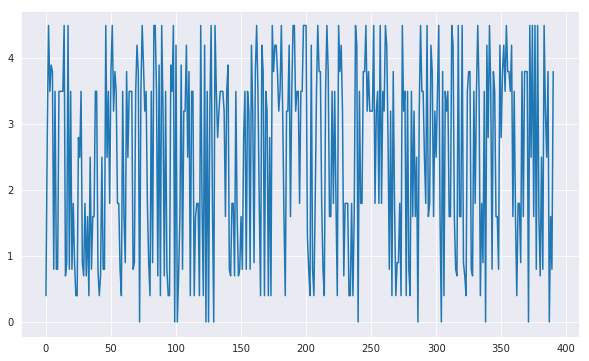

In [42]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
x = np.arange(0, len(score_dict[2]),1)
y = np.arange(min(score), max(score),1)

# line_1 = ax.plot(x, score_dict[0])
# line_1 = ax.plot(x, score_dict[1])
line_1 = ax.plot(x, score_dict[2])

In [33]:
my_counts_dict = {}
for i in codons:
    aa = codons[i]
    if aa in my_counts_dict:
        my_counts_dict[aa] += 1
    else:
        my_counts_dict[aa] = 1

counts_dict = {}
with open('codon_files/codon_counts.txt') as f:
    counts_list = f.readlines()
    for aa in counts_list:
        aa, count = aa.strip().split()
        aa = aa_t_dict[aa] # translate on the fly from passing aa into aa_t_dict
        counts_dict[aa] = float(count.split()[0])

print(len(my_counts_dict))
len(counts_dict)        

21


20

In [34]:
comp_dict = {}
with open('codon_files/aa_comp.txt') as f:
    aa_c_list = f.readlines()
    for aa in aa_c_list:
#         print(aa.strip().split())
        aa, comp = aa.strip().split()
        aa = aa_t_dict[aa] # translate on the fly from passing aa into aa_t_dict
        comp_dict[aa] = float(comp.split()[0])

In [35]:
comp_dict

{'A': 8.3,
 'R': 5.7,
 'N': 4.4,
 'D': 5.3,
 'C': 1.7,
 'Q': 4.0,
 'E': 6.2,
 'G': 7.2,
 'H': 2.2,
 'I': 5.2,
 'L': 9.0,
 'K': 5.7,
 'M': 2.4,
 'F': 3.9,
 'P': 5.1,
 'S': 6.9,
 'T': 5.8,
 'W': 1.3,
 'Y': 3.2,
 'V': 6.6}

In [37]:
total = 0
for i in comp_dict:
    total += comp_dict[i]
print(total)

100.10000000000001


In [ ]:
# plots the genetic drift of each allele through the generations
sns.set_style("darkgrid")
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
x = np.arange(0,len(range(generation)),1)
line_1 = ax.plot(x, proportion_A)
line_2 = ax.plot(x, proportion_B)
plt.legend('AB', fontsize=12)
plt.xlabel('Generations', fontsize=13)
plt.ylabel('Allelic proportion', fontsize=13)
plt.title('Genetic Drift', fontsize=15)
plt.show()


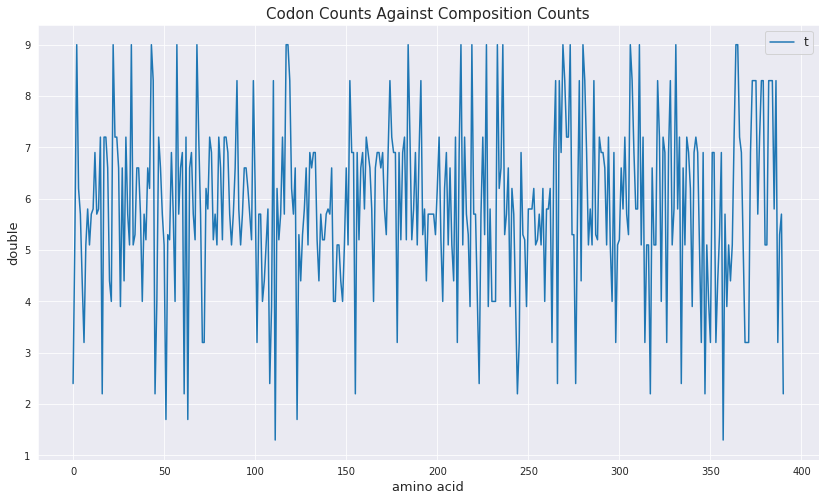

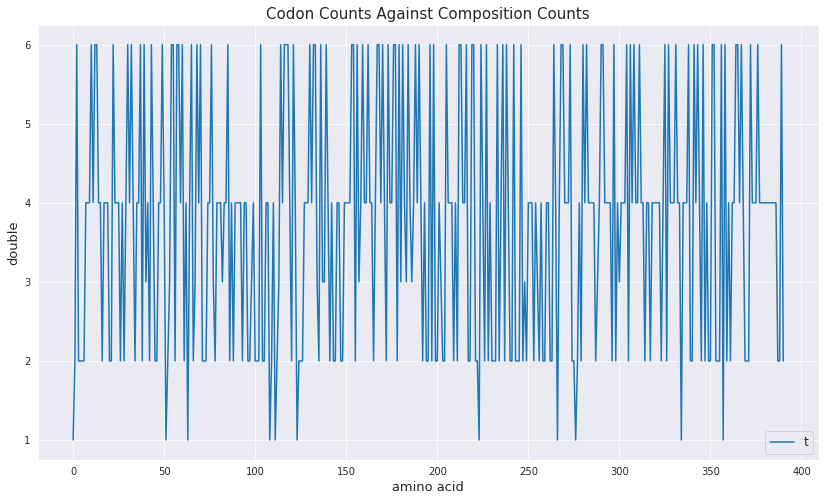

In [59]:
clean_prot = protein_dict[0][:-1]
clean_comp = [comp_dict[i] for i in clean_prot]
clean_counts = [counts_dict[i] for i in clean_prot]

fig = plt.figure(figsize=(14,8))
ax = plt.axes()
x = np.arange(0, len(clean_prot),1)
line_1 = ax.plot(x, clean_comp)
plt.title('Codon Counts Against Composition Counts', fontsize=15)
plt.xlabel('amino acid', fontsize=13)
plt.ylabel('double', fontsize=13)
plt.legend('testing123', fontsize=12)
plt.show()

fig = plt.figure(figsize=(14,8))
ax = plt.axes()
x = np.arange(0, len(clean_prot),1)
line_2 = ax.plot(x, clean_counts)
plt.title('Codon Counts Against Composition Counts', fontsize=15)
plt.xlabel('amino acid', fontsize=13)
plt.ylabel('double', fontsize=13)
plt.legend('testing123', fontsize=12)
plt.show()